### Qual o problema ? 
- Maximizar o resultado da seguinte equação matemática
![title](image/equacao.png)
- Qual valor de X, resulta em um resultado maior ? 
- Não temos a resposta exata, ou seja, na teoria não sabemos o quanto essa função pode ser maximizada, mas temos em mente que quanto maior melhor

### Representação 
- O domínio do problema se dá em um intervalo de [0, 1]
- X pode assumir qualquer valor dentro desse domínio

### Objetivo
- Maximizar o resultado da equação através do melhor valor possível de X.
- O melhor valor será definido por aquele que tiver o maior resultado final dentre todas as soluções encontradas

## Codificando
- Vamos começar com a importação das bibliotecas

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Pixiedust database opened successfully


### Criação da função de custo / avaliação
- É basicamente o coração dos algoritmos de otimização
- A função de custo é onde a avaliação do algoritmo vai acontecer de fato
- Nesse caso a função de custo é dada simplesmente pelo resultado da equação que deve ser maximizado

In [127]:
def funcao_custo(x):
    custo = 2 ** -2 * (x - 0.1 / 0.9) ** 2 * (math.sin(5 * math.pi * x))** 6
    return custo

### Função de plotar o gráfico
- Usado para plotar o gráfico com os resultados

In [3]:
def plotar_busca(resultados):
    t = np.arange(0.0, len(resultados), 1)
    
    plt.figure(figsize=(12,8))
    plt.plot(t, resultados)
    plt.show()

### Função de get vizinhos
- Essa função é usada para pegar os vizinhos de cada dimensão da minha variável, no nosso caso temos uma única dimensão, que é a variável X
- Sendo assim vamos pegar os dois vizinhos possíveis do nosso X, considerando possíveis movimentos que ele pode fazer
- O vizinho nada mais é que uma perturbação no valor inicial, pode se um valor constante ou alguma outra formula, como a guasiana

In [327]:
def get_vizinhos(solucao, aprendizado):
    vizinhos = []
    aprendizado = aprendizado / 10 if aprendizado >= 10 else 1
    constante = 0.005 / aprendizado
    vizinho_superior = solucao + constante if solucao + constante < 1 else solucao
    vizinho_inferior = solucao - constante if solucao - constante > 0 else solucao
    
    vizinhos.append(vizinho_superior)
    vizinhos.append(vizinho_inferior)
    return vizinhos

### Hill Climbing
- Função que vai fazer o cálculo do algoritmo de subida da encosta

In [358]:
def hill_climbing(funcao_custo):
    # random.seed(a=0)
    solucao = random.random()
    custos = []
    count = 1
    parar_no_plato = 0

    while count <= 400:
        vizinhos = get_vizinhos(solucao, count)
        
        atual = funcao_custo(solucao)
        melhor = atual 
        solucao_atual = solucao
        custos.append(atual)

        for i in range(len(vizinhos)):
            custo = funcao_custo(vizinhos[i])
            if custo >= melhor:
                parar_no_plato = parar_no_plato + 1 if custo == melhor else 0
                melhor = custo
                solucao = vizinhos[i]

        count += 1
        if melhor == atual and solucao_atual == solucao or parar_no_plato == 20:
            print('plato' if parar_no_plato == 20 else 'sem melhoria')
            break

    return solucao, custos

sem melhoria
sem melhoria
sem melhoria
sem melhoria
sem melhoria
sem melhoria
sem melhoria
sem melhoria
sem melhoria
sem melhoria
Valor X:  0.30661405275000697
Maior Custo 0.0092503495375626


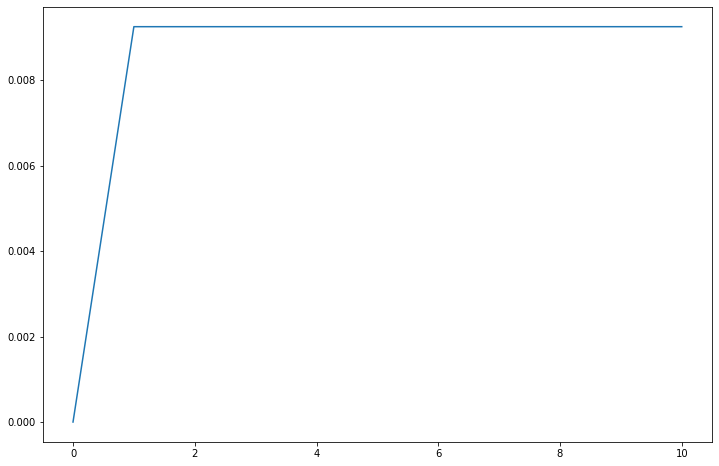

In [365]:
solucao_subida_encosta = hill_climbing(funcao_custo)

print('Valor X:', solucao_subida_encosta[0])
print('custos', solucao_subida_encosta[1])
plotar_busca(solucao_subida_encosta[1])

### Tentativas de otimização
- Código feito com objetivo de ajudar nosso algoritmo de busca
#### Parada no platô
- Caso nosso algoritmo tenha diversas interações sem gerar melhoria, ele da um break em sua execução
#### Redução da "taxa de aprendizado" de forma dinâmica
- Reduzir a "taxa de aprendizado"/perturbação nos nosso vizinhos, como forma de tentar evitar que o algoritmo perca um máximo/mínimo local/globa por conta de dar um "passo" muito grande
#### Exploração do espaço de características
- Garantir que os pontos gerados de forma aleatória estejam distantes uns dos outros para explorar um espaço maior


### Simulated annealing
Recozimento simulado é inspirado em um fenômeno da física, onde se esquenta um metal ou vidro até quase ele se liquefazer e depois se esfria devagar, para que os átomos percam a vibração aos poucos e o material fique rígido

- A diferença dele para o Hill Climbing é que ele tem uma probabilidade P de aceitar valores negativos
- Quanto mais no início do algoritmo, maior a sua chance de aceitar um valor negativo

### Probabilidade
- A probabilidade do simulated annealing é dada pela função exponencial exp(x)
- Nessa função, elevamos o número de euler ~2.7 à um valor de x.
- O X no nosso caso é o resultado da subtração entre o novo custo e o custo anterior divido pela temperatura: (x' - x) / T
- A temperatura vai diminuindo gradativamente, limitando nossas interações e garantindo que a probabilidade de se aceitar valores negativos também diminua

In [335]:
def simulated_annealing(dominio, funcao_custo, temperatura = 10000.0, resfriamento = 0.95, passo = 1):
    # random.seed(a=0)
    solucao = random.random()
    custos = []
    count = 1
    parar_no_plato = 0

    while temperatura > 0.1:
        vizinhos = get_vizinhos(solucao, count)
        
        atual = funcao_custo(solucao)
        melhor = atual 
        solucao_atual = solucao
        custos.append(atual)

        for i in range(len(vizinhos)):
            
            if parar_no_plato == 20:
                break

            custo = funcao_custo(vizinhos[i])
            probabilidade = pow(math.e, (-custo - melhor) / temperatura)
            
            if custo >= melhor or random.random() < probabilidade:
                parar_no_plato = parar_no_plato + 1 if custo == melhor else 0
                melhor = custo
                solucao = vizinhos[i]
               
        temperatura = temperatura * resfriamento

    return solucao, custos

Menor custo 3.205102403983724e-10


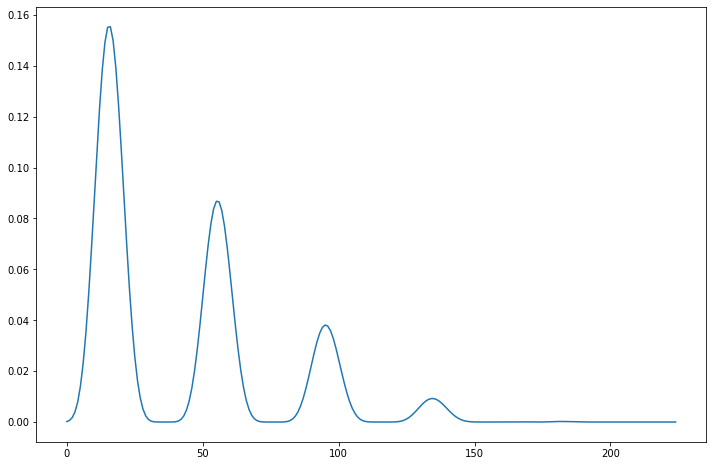

In [342]:
solucao_tempera_simulada = simulated_annealing([0, 1], funcao_custo)
custo_tempera_simulada = funcao_custo(solucao_tempera_simulada[0])

print('Menor custo', custo_tempera_simulada)
plotar_busca(solucao_tempera_simulada[1])